<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/basics/__Models__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Models: Classification, Regression, and Clustering**

## **1. Classification**

### **Overview**
Classification is a supervised learning technique used to predict the categorical labels of new observations based on past data. The goal is to assign each input sample to one of several predefined categories.

### **Example Scenarios**
- **Email Spam Detection**: Classifying emails as "Spam" or "Not Spam" based on their content.
- **Medical Diagnosis**: Predicting whether a patient has a specific disease ("Disease" or "No Disease") based on various medical test results.
- **Sentiment Analysis**: Determining the sentiment of customer reviews as "Positive," "Neutral," or "Negative."

### **Common Algorithms**
- **K-Nearest Neighbors (KNN)**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Logistic Regression**
- **Naive Bayes**
- **Random Forest**
- **Gradient Boosting**

## **2. Regression**

### **Overview**
Regression is a supervised learning technique used to predict continuous values. The goal is to model the relationship between a dependent variable and one or more independent variables.

### **Example Scenarios**
- **House Price Prediction**: Estimating the price of a house based on features like size, number of rooms, and location.
- **Stock Price Forecasting**: Predicting future stock prices based on historical data and trends.
- **Weather Forecasting**: Predicting the temperature or precipitation based on historical weather data.

### **Common Algorithms**
- **K-Nearest Neighbors (KNN)**
- **Support Vector Regression (SVR)**
- **Decision Tree Regressor**
- **Linear Regression**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

## **3. Clustering**

### **Overview**
Clustering is an unsupervised learning technique used to group similar data points together. The goal is to partition a dataset into clusters where data points in the same cluster are more similar to each other than to those in other clusters.

### **Example Scenarios**
- **Customer Segmentation**: Grouping customers based on purchasing behavior to tailor marketing strategies.
- **Image Compression**: Reducing the number of colors in an image by clustering similar colors.
- **Document Classification**: Grouping documents into topics or categories based on their content.

### **Common Algorithms**
- **K-Means Clustering**
- **Hierarchical Clustering**
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**




---
# Classification: K-Nearest Neighbors (KNN)

## **Concept**

K-Nearest Neighbors (KNN) is a simple, intuitive, and versatile classification algorithm used in machine learning. It is a type of instance-based learning or lazy learning where the model does not explicitly learn a function but makes predictions based on the training instances.

## **Logic Behind KNN**

1. **Instance-Based Learning**: KNN makes decisions based on the similarity between the data points in the training dataset and the new data points. The idea is that similar data points are likely to have similar labels.

2. **Distance Metric**: KNN uses a distance metric (typically Euclidean distance) to find the closest data points (neighbors) to the new observation. The choice of distance metric can affect the performance of the algorithm.

3. **Majority Voting**: For classification tasks, KNN assigns the label of the majority class among the K nearest neighbors. For example, if the majority of the K nearest neighbors belong to Class A, the new data point will be classified as Class A.

## **Calculation Behind KNN**

1. **Distance Calculation**: For each test sample, calculate the distance between the test sample and all training samples using a chosen distance metric (e.g., Euclidean distance).

   - **Euclidean Distance**: The most common distance metric, calculated as:
     \[
     d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
     \]
     where \(x_i\) and \(y_i\) are the feature values of the test and training samples, respectively.

2. **Sorting**: Sort the training samples based on the calculated distances in ascending order.

3. **Neighbor Selection**: Select the top K nearest training samples.

4. **Voting**: Determine the most frequent class among these K neighbors. Assign this class label to the test sample.

## **Use Cases**

- **Pattern Recognition**: KNN can be used for recognizing patterns or objects in various fields such as image recognition, handwriting recognition, and speech recognition.
- **Recommendation Systems**: It can be applied to recommend products or content by finding users with similar preferences.
- **Medical Diagnosis**: KNN is useful for diagnosing diseases based on patient symptoms and historical data.
- **Anomaly Detection**: Identifying unusual patterns or outliers in data.

## **Scikit-Learn Parameters**

In scikit-learn, the KNN classifier is implemented as `KNeighborsClassifier`. Key parameters include:

- **`n_neighbors`**: Number of neighbors to use for classification. Default is 5.
  ```python
  KNeighborsClassifier(n_neighbors=5)



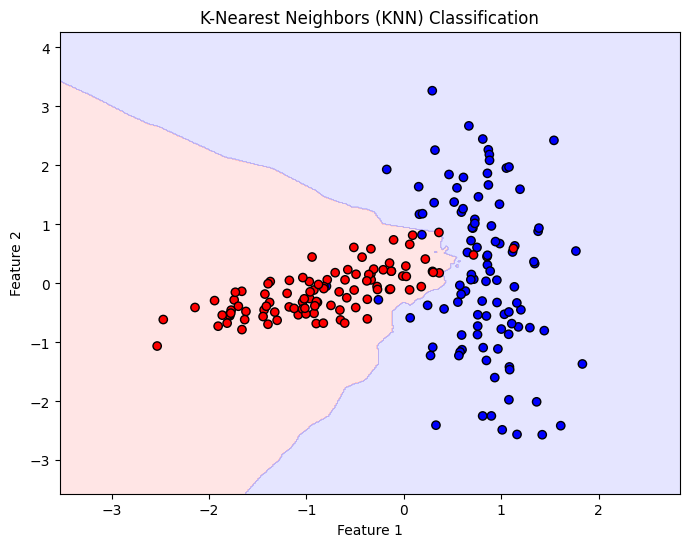

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Create synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_scaled, y)

# Create mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('K-Nearest Neighbors (KNN) Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Classification: Support Vector Machine (SVM)

## **Concept**

Support Vector Machine (SVM) is a powerful classification algorithm used for both linear and non-linear classification tasks. It works by finding a hyperplane that best separates the data into different classes. The goal is to maximize the margin between the classes, which helps in achieving a better generalization on unseen data.

## **Logic Behind SVM**

1. **Hyperplane**: In an N-dimensional space, a hyperplane is a flat affine subspace of dimension \(N-1\). SVM aims to find the hyperplane that best separates the data points of different classes.

2. **Margin**: The margin is the distance between the hyperplane and the nearest data points from either class. SVM tries to maximize this margin to ensure the best separation between classes.

3. **Support Vectors**: Support vectors are the data points that are closest to the hyperplane and play a crucial role in defining the position and orientation of the hyperplane. They are the points used to calculate the margin.

4. **Kernel Trick**: For non-linear classification, SVM can use different kernels (e.g., polynomial, radial basis function (RBF)) to transform the data into a higher-dimensional space where a linear hyperplane can be used for separation.

## **Calculation Behind SVM**

### **1. Objective Function**

The SVM aims to find the optimal hyperplane that separates the data into different classes with the maximum margin. The objective function is:

\[
\text{minimize} \quad \frac{1}{2} \|w\|^2
\]

This is subject to the constraints:

\[
y_i (w \cdot x_i + b) \geq 1 \quad \text{for all } i
\]

Where:
- \( w \) is the weight vector (normal to the hyperplane).
- \( x_i \) represents the feature vectors of the training samples.
- \( y_i \) are the labels of the training samples (+1 or -1).
- \( b \) is the bias term.

### **2. Support Vector Calculation**

The support vectors are the data points that are closest to the hyperplane. These points are used to determine the position of the hyperplane and calculate the margin. The margin is defined as:

\[
\text{Margin} = \frac{2}{\|w\|}
\]

The SVM optimization process finds the weight vector \( w \) and bias \( b \) that maximizes this margin while correctly classifying the training samples.

### **3. Kernel Function**

For non-linear data, SVM uses a kernel function to map the data into a higher-dimensional space where a linear hyperplane can be applied. Common kernels include:

- **Linear Kernel**: \( K(x_i, x_j) = x_i \cdot x_j \)

- **Polynomial Kernel**: \( K(x_i, x_j) = (x_i \cdot x_j + c)^d \)

- **Radial Basis Function (RBF) Kernel**: \( K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) \)

- **Sigmoid Kernel**: \( K(x_i, x_j) = \tanh(\alpha x_i \cdot x_j + c) \)

These kernels help in transforming the data and applying the SVM algorithm in the transformed feature space.

## **Use Cases**

- **Text Classification**: SVM is commonly used for text classification tasks such as spam detection and sentiment analysis.
- **Image Classification**: It can be applied to
image recognition tasks, including handwritten digit recognition and facial recognition.
- **Bioinformatics**: SVM is used for classifying protein sequences, gene expression data, and disease classification.
- **Finance**: SVM helps in predicting stock market trends, credit scoring, and fraud detection.

## **Scikit-Learn Parameters**

In scikit-learn, the SVM classifier is implemented as `SVC`. Key parameters include:

- **`C`**: Regularization parameter that controls the trade-off between achieving a low training error and minimizing the model complexity. Default is 1.0.
  ```python
  SVC(C=1.0)
  ```
- **`kernel`**:Specifies the kernel type to be used in the algorithm. Options include
  - linear : Linear kernel.
  - poly : Polynomial kernel.
  - rbf : Radial basis function kernel
  - sigmoid : sigmoid kernal
   ```python
   SVC(kernel='rbf')
   ```

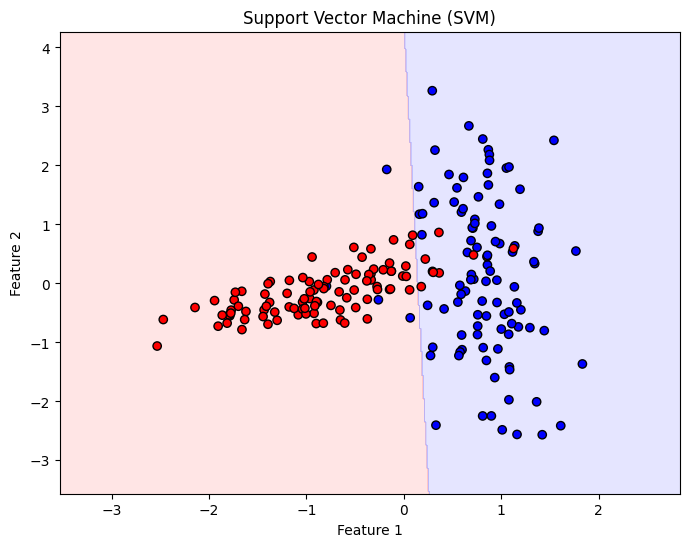

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Create synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = SVC(kernel='linear', C=1)

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Support Vector Machine (SVM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Classification: Linear Support Vector Classification (Linear SVC)

## **Concept**

Linear Support Vector Classification (Linear SVC) is a variant of the Support Vector Machine (SVM) algorithm designed for linear classification problems. It works by finding the best hyperplane that separates data points of different classes. This hyperplane is a linear decision boundary in a high-dimensional space that optimally divides the data into distinct classes.

## **Logic Behind Linear SVC**

1. **Hyperplane**: The goal of Linear SVC is to identify a hyperplane (a flat affine subspace) that separates different classes in the feature space. This hyperplane is characterized by a linear equation and maximizes the margin between the classes.

2. **Margin**: The margin is the distance between the hyperplane and the nearest data points of each class. By maximizing this margin, Linear SVC ensures that the decision boundary is as far away as possible from the closest points, which helps improve the generalization of the model.

3. **Support Vectors**: Support vectors are the critical data points that lie closest to the hyperplane. These points are used to determine the position and orientation of the hyperplane. They are essential for the model, as they directly influence the margin and the decision boundary.

4. **Optimization Problem**: Linear SVC solves an optimization problem to find the optimal hyperplane. The goal is to balance fitting the training data correctly and ensuring that the hyperplane is as far away from the support vectors as possible. This involves finding the right trade-off between minimizing classification errors and maximizing the margin.

## **Detailed Model Explanation**

### **1. Finding the Hyperplane**

The Linear SVC algorithm searches for the best hyperplane that divides the data into different classes. It does this by considering all possible hyperplanes and selecting the one with the largest margin between the closest data points of each class.

### **2. Regularization**

The model uses a regularization parameter to control the trade-off between a large margin and a low classification error. A higher regularization parameter forces the model to fit the training data more precisely, which might lead to overfitting. Conversely, a lower regularization parameter allows for a larger margin but might result in more misclassifications.

### **3. Model Training**

During training, Linear SVC learns the weight vector and bias term that define the hyperplane. This involves optimizing the model's parameters to minimize classification errors while maximizing the margin. The algorithm uses optimization techniques to find the best possible hyperplane.

### **4. Use Cases**

- **Text Classification**: Linear SVC is well-suited for problems where data can be separated linearly, such as spam detection in emails and sentiment analysis in texts.
- **Image Classification**: It is effective in classifying images where the features can be linearly separated, such as handwritten digit recognition.
- **Bioinformatics**: Linear SVC is used to classify gene expression data and predict disease outcomes based on gene profiles.

## **Scikit-Learn Parameters**

In scikit-learn, the Linear SVC classifier is implemented as `LinearSVC`. Here are the key parameters you can use to customize the model:

- **`C`**: Regularization parameter that controls the trade-off between fitting the training data and maintaining model simplicity. A larger value of `C` aims for fewer misclassifications but might overfit the data, while a smaller value encourages a larger margin and simpler model.
  ```python
  LinearSVC(C=1.0)
  ```
- **`penalty`**:Specifies the type of regularization used. Options are:
  - l1 : L1 regularization, which can lead to sparse models.
  - l2 :  L2 regularization, which is the default and helps in finding a smoother decision boundary
  ```python
  LinearSVC(penalty='l2')
  ```


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


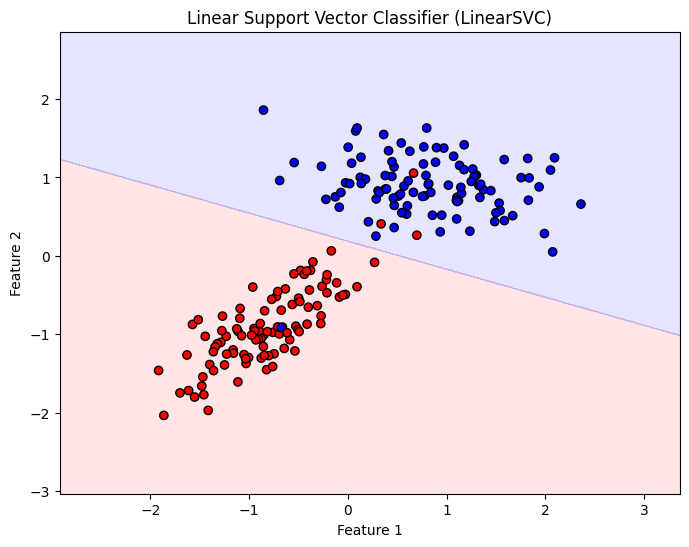

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib.colors import ListedColormap

# Create synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=16)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = LinearSVC(C=1)

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Linear Support Vector Classifier (LinearSVC)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## classification_decision_tree.py

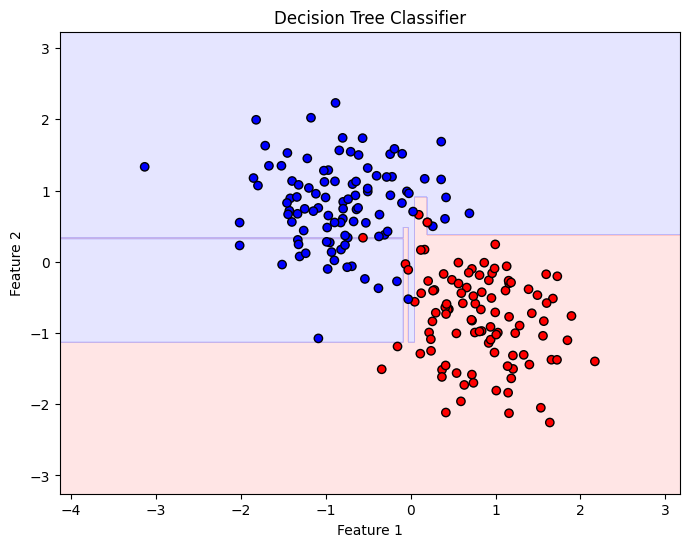

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=50)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = DecisionTreeClassifier()

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Decision Tree Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Classification: Logistic Regression

## **Concept**

Logistic Regression is a statistical method used for binary classification problems. It estimates the probability that a given input belongs to a particular class. Despite its name, logistic regression is used for classification tasks rather than regression tasks. It is based on the logistic function, also known as the sigmoid function.

## **Logic Behind Logistic Regression**

1. **Sigmoid Function**: Logistic Regression uses the sigmoid function to model the probability of a binary outcome. The sigmoid function maps any real-valued number into the range [0, 1]. The function is defined as:
   \[
   \sigma(z) = \frac{1}{1 + e^{-z}}
   \]
   where \( z \) is the linear combination of the input features.

2. **Linear Combination**: The model calculates a linear combination of the input features:
   \[
   z = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n
   \]
   where \( w \) are the weights and \( x \) are the feature values.

3. **Probability Estimation**: The output of the sigmoid function is interpreted as the probability of the positive class. The model predicts the class with the highest probability. If the probability is greater than 0.5, the instance is classified as belonging to the positive class; otherwise, it is classified as belonging to the negative class.

4. **Optimization**: The weights \( w \) are optimized using techniques such as gradient descent to minimize the error between predicted and actual values.

## **Detailed Model Explanation**

### **1. Fitting the Model**

Logistic Regression fits the model by estimating the parameters that best describe the relationship between the input features and the output class. The fitting process involves finding the optimal weights that minimize the error using optimization algorithms.

### **2. Regularization**

Regularization is used to prevent overfitting and improve the generalization of the model. It adds a penalty to the cost function based on the magnitude of the weights. The two common types of regularization are:
- **L1 Regularization**: Encourages sparsity by adding a penalty proportional to the absolute value of the weights.
- **L2 Regularization**: Encourages smaller weights by adding a penalty proportional to the square of the weights.

### **3. Model Evaluation**

The performance of a logistic regression model is evaluated using metrics such as accuracy, precision, recall, and F1-score. The confusion matrix can also be used to visualize the performance of the model by showing the true positives, true negatives, false positives, and false negatives.

### **4. Use Cases**

- **Medical Diagnosis**: Logistic Regression is used to predict the likelihood of a disease based on patient features, such as predicting whether a patient has a certain medical condition.
- **Credit Scoring**: It can predict the probability of a borrower defaulting on a loan based on their financial history and other features.
- **Marketing**: Logistic Regression is used to predict whether a customer will respond to a marketing campaign based on their demographic and behavioral data.

## **Scikit-Learn Parameters**

In scikit-learn, the Logistic Regression classifier is implemented as `LogisticRegression`. Here are the key parameters you can use to customize the model:

- **`C`**: Regularization parameter that controls the trade-off between fitting the training data and maintaining model simplicity. A smaller value of `C` means stronger regularization.
  ```python
  LogisticRegression(C=1.0)
  ```

- **`solver`**:Algorithm to use for optimization. Options include
  - liblinear : Solver that is good for small datasets and supports L1 regularization.
  - lbfgs : Solver for larger datasets that supports L2 regularization.
  - saga : Solver that supports both L1 and L2 regularization and works well for large datasets.
```python
LogisticRegression(solver='liblinear')
```

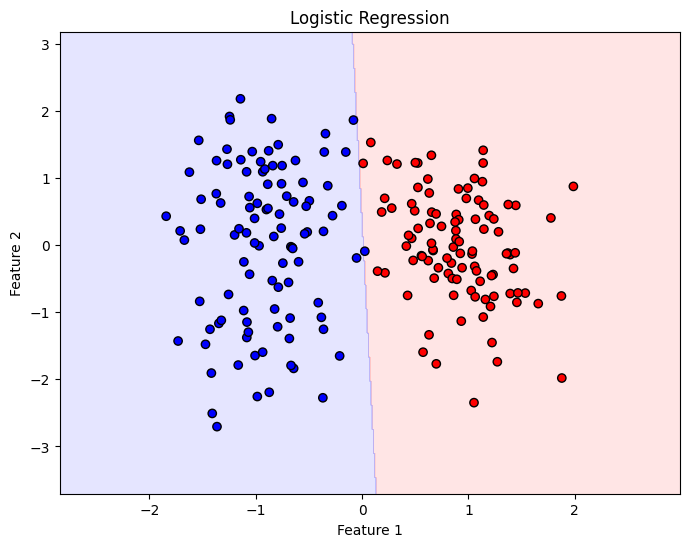

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=60)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = LogisticRegression()

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## classification_naive_bayes.py

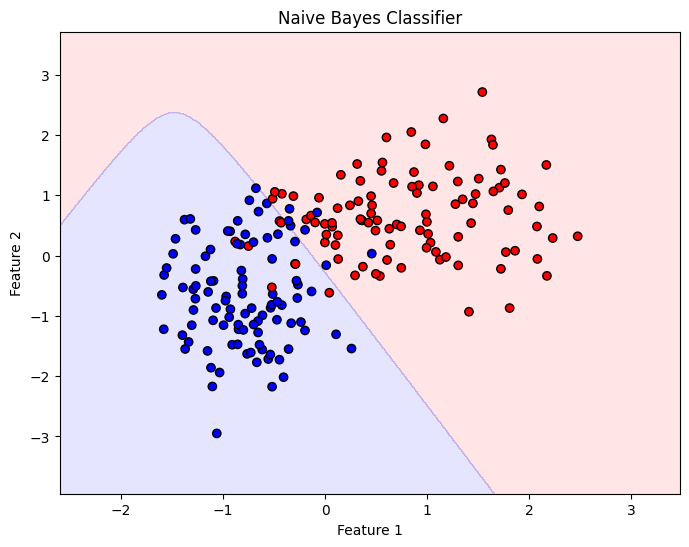

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=26)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = GaussianNB()

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Naive Bayes Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## classification_random_forest.py

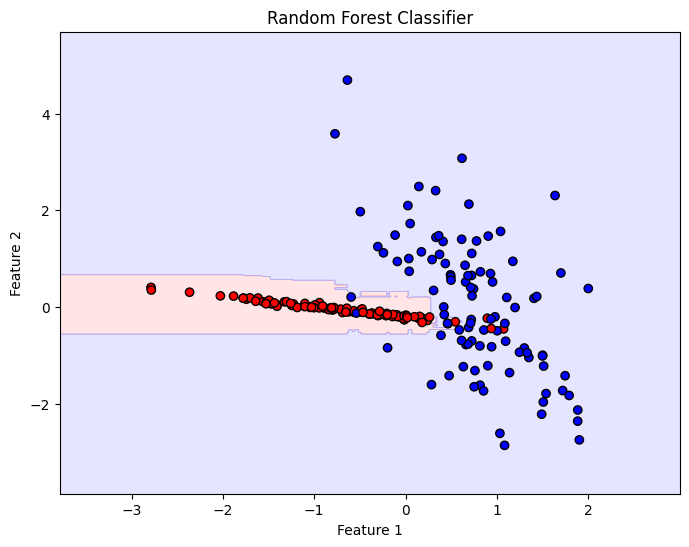

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=17)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Random Forest Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## classification_gradient_boosting.py

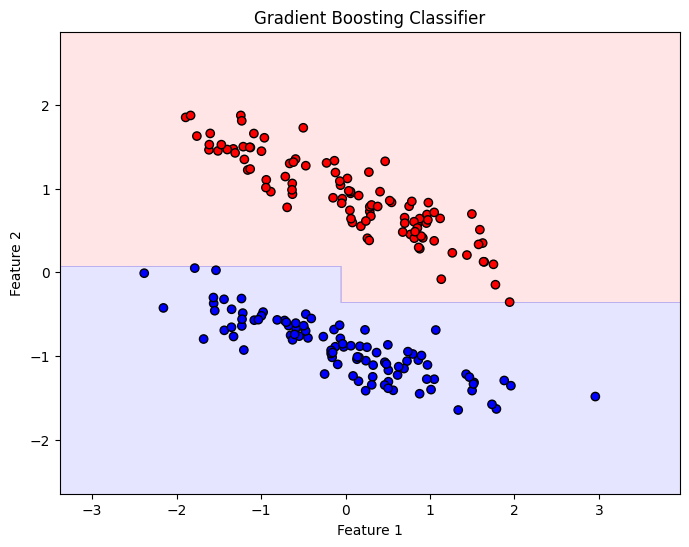

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=90)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = GradientBoostingClassifier()

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Gradient Boosting Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Regression: K-Nearest Neighbors (KNN)

## **Concept**

K-Nearest Neighbors (KNN) is a non-parametric and lazy supervised learning algorithm used for both classification and regression tasks. In regression, KNN predicts the target value based on the average of the values of the k-nearest neighbors in the feature space.

## **Logic Behind K-Nearest Neighbors (KNN) Regression**

1. **Distance Metric**: KNN uses a distance metric (such as Euclidean distance) to determine the proximity between data points. For a given test instance, KNN finds the k-nearest training examples in the feature space based on this distance metric.

2. **Neighbor Selection**: The algorithm selects the k-nearest neighbors to the test instance. The value of k is a user-defined parameter that determines the number of nearest neighbors to consider.

3. **Prediction**: The predicted value for the test instance is the average of the target values of the k-nearest neighbors. The idea is that similar instances (closer in the feature space) have similar target values, so the average provides a reasonable estimate for the test instance.

4. **Non-parametric Nature**: KNN does not make any assumptions about the underlying distribution of the data. It adapts to the local structure of the data by directly considering the nearest neighbors.

## **Detailed Model Explanation**

### **1. Distance Calculation**

The distance between data points is calculated using a chosen metric. The most common metric is Euclidean distance:
   \[
   d(x_i, x_j) = \sqrt{\sum_{k=1}^n (x_{ik} - x_{jk})^2}
   \]
   where \( x_i \) and \( x_j \) are feature vectors of the data points.

### **2. Choice of k**

The parameter k determines how many neighbors are considered for making the prediction. A small k can make the model sensitive to noise, while a large k can smooth out the predictions but may lose detail. Cross-validation is often used to find the optimal k.

### **3. Model Evaluation**

KNN regression can be evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). These metrics measure how close the predicted values are to the actual target values.

### **4. Use Cases**

- **Real Estate Pricing**: KNN regression can be used to predict the price of a property based on features such as size, location, and number of rooms, by averaging the prices of similar properties.
- **Stock Price Prediction**: It can estimate the future stock price based on historical data and similar past performance.
- **Recommendation Systems**: KNN regression can be used to predict ratings or preferences for items based on the ratings given by similar users.

## **Scikit-Learn Parameters**

In scikit-learn, the KNN regressor is implemented as `KNeighborsRegressor`. Here are the key parameters you can use to customize the model:

- **`n_neighbors`**: The number of neighbors to use for prediction. This is a critical parameter that affects the model's performance. A small value of `n_neighbors` makes the model sensitive to noise, while a larger value smooths the predictions.
  ```python
  KNeighborsRegressor(n_neighbors=5)


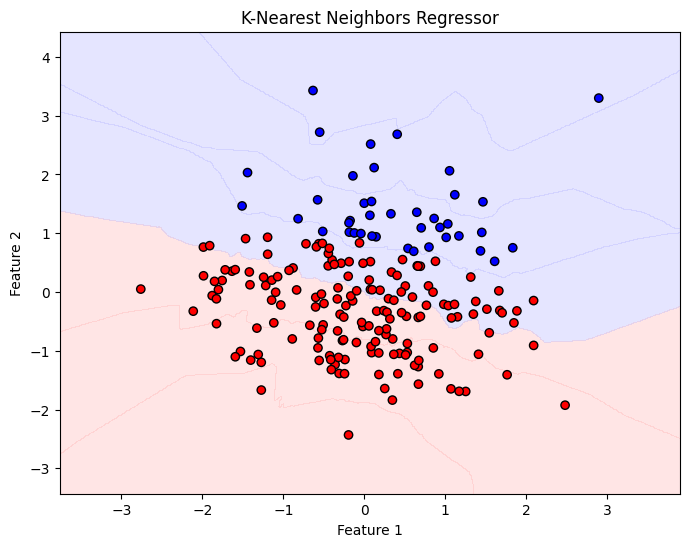

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=100)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('K-Nearest Neighbors Regressor')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



# Regression: Support Vector Regression (SVR)

## **Concept**

Support Vector Regression (SVR) is an extension of Support Vector Machines (SVM) designed for regression tasks. SVR aims to fit a function within a specified margin of tolerance, ensuring that deviations beyond this margin are minimized. It is used to predict continuous values and is robust to outliers and noise.

## **Logic Behind Support Vector Regression (SVR)**

1. **Margin of Tolerance**: SVR tries to fit a function that deviates from the actual observed values by at most a specified margin (epsilon, ε). Data points within this margin are considered acceptable deviations, and the model does not penalize them.

2. **Support Vectors**: Only the data points that lie outside the margin (support vectors) are used to determine the function. These support vectors are critical in defining the shape of the regression function.

3. **Objective Function**: The objective of SVR is to find a function that has at most ε deviation from the actual target values and at the same time, is as flat as possible. This involves minimizing a cost function that balances the margin of tolerance and the flatness of the function.

4. **Kernel Trick**: SVR can use different kernel functions to handle non-linear relationships. The kernel trick allows SVR to operate in a higher-dimensional space without explicitly transforming the data, thus capturing complex patterns.

5. **Regularization**: SVR includes a regularization parameter (C) that controls the trade-off between achieving a low error on the training data and minimizing the model complexity.

## **Detailed Model Explanation**

### **1. Margin of Tolerance**

SVR introduces a margin of tolerance (ε) within which deviations are tolerated without penalty. The model aims to fit the data so that deviations within this margin do not incur a penalty.

### **2. Support Vectors**

Support vectors are the data points that fall outside the margin of tolerance. These points are crucial in defining the regression function. The model does not consider the data points within the margin when training.

### **3. Objective Function**

The SVR model optimizes the following objective function:
   \[
   \min \frac{1}{2} ||w||^2 + C \sum_{i=1}^N \xi_i
   \]
   where \(w\) is the weight vector, \(C\) is the regularization parameter, and \(\xi_i\) are the slack variables representing deviations outside the margin.

### **4. Kernel Functions**

SVR uses kernel functions to handle non-linear relationships. Common kernels include:
   - **Linear Kernel**: \( K(x_i, x_j) = x_i^T x_j \)
   - **Polynomial Kernel**: \( K(x_i, x_j) = (x_i^T x_j + c)^d \)
   - **Radial Basis Function (RBF) Kernel**: \( K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2) \)

### **5. Regularization Parameter (C)**

The regularization parameter \(C\) controls the trade-off between achieving a low error on the training data and minimizing the complexity of the model. A higher \(C\) value puts more emphasis on minimizing training error, while a lower \(C\) value results in a smoother regression function.

## **Scikit-Learn Parameters**

In scikit-learn, the SVR regressor is implemented as `SVR`. Here are the key parameters you can use to customize the model:

- **`C`**: Regularization parameter. It controls the trade-off between achieving a low error on the training data and minimizing the model complexity.
  ```python
  SVR(C=1.0)


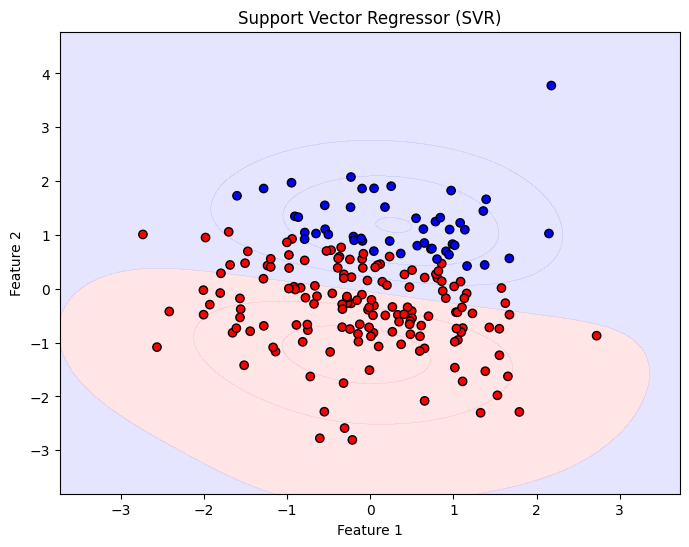

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=110)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = SVR(kernel='rbf')

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Support Vector Regressor (SVR)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## regression_decision_tree.py

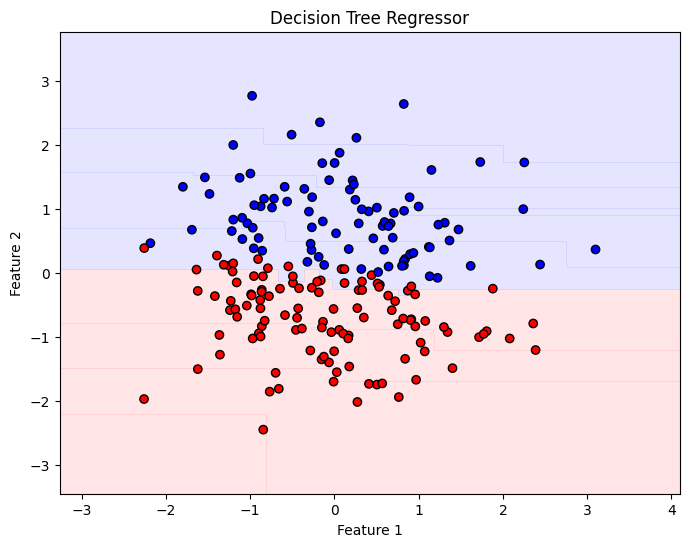

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=120)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = DecisionTreeRegressor()

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Decision Tree Regressor')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Regression: Linear Regression

## **Concept**

Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The model assumes a linear relationship between the inputs (features) and the output (target). It aims to find the best-fitting line through the data points, minimizing the difference between the predicted values and the actual values.

## **Logic Behind Linear Regression**

1. **Objective**: The primary objective of Linear Regression is to predict the value of a dependent variable (target) based on the values of independent variables (features). The model attempts to find the line (or hyperplane in higher dimensions) that best represents the relationship between the variables.

2. **Equation**: In its simplest form, the equation for linear regression is:
   \[
   y = \beta_0 + \beta_1 x
   \]
   where \( y \) is the predicted value, \( \beta_0 \) is the intercept, \( \beta_1 \) is the coefficient (slope), and \( x \) is the input feature.

3. **Loss Function**: The performance of the model is evaluated using a loss function, typically Mean Squared Error (MSE). The goal is to minimize this error:
   \[
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
   \]
   where \( y_i \) is the actual value, \( \hat{y_i} \) is the predicted value, and \( n \) is the number of samples.

4. **Fitting the Model**: The model is fitted by finding the values of \( \beta_0 \) and \( \beta_1 \) that minimize the MSE. This is typically done using methods like Ordinary Least Squares (OLS) or gradient descent.

5. **Assumptions**: Linear Regression assumes that:
   - The relationship between the dependent and independent variables is linear.
   - The residuals (errors) are normally distributed.
   - The residuals have constant variance (homoscedasticity).
   - There is no multicollinearity among the independent variables.

## **Detailed Model Explanation**

### **1. Objective**

Linear Regression aims to model the relationship between one or more independent variables and a dependent variable by fitting a linear equation to observed data. The objective is to minimize the discrepancy between the actual and predicted values.

### **2. Equation**

The linear regression model predicts the target variable as a weighted sum of the input features, plus an intercept. In multiple regression, this extends to:
   \[
   y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p
   \]
   where \( x_1, x_2, \ldots, x_p \) are the features and \( \beta_1, \beta_2, \ldots, \beta_p \) are the coefficients.

### **3. Loss Function**

The Mean Squared Error (MSE) is used to evaluate the performance of the model:
   \[
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
   \]
   Minimizing MSE helps in finding the best-fitting line.

### **4. Fitting the Model**

The fitting process involves determining the best values for the coefficients and intercept that minimize the loss function. Methods like Ordinary Least Squares (OLS) are commonly used to find these values.

### **5. Assumptions**

Linear Regression assumes a linear relationship between the features and target, normality of residuals, constant variance of residuals, and no multicollinearity among the features.

## **Scikit-Learn Parameters**

In scikit-learn, Linear Regression is implemented as `LinearRegression`. Here are the key parameters you can use to customize the model:

- **`fit_intercept`**: Whether to calculate the intercept for this model. If set to `False`, no intercept will be used in calculations.
  ```python
  LinearRegression(fit_intercept=True)


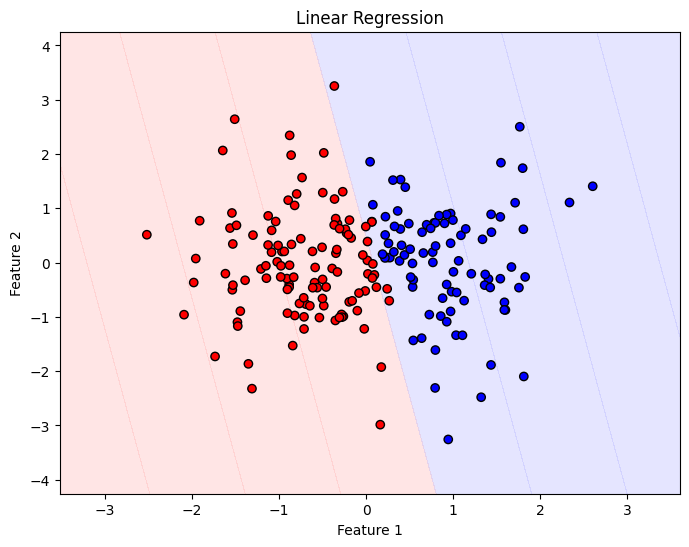

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=130)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = LinearRegression()

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Linear Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## regression_random_forest.py

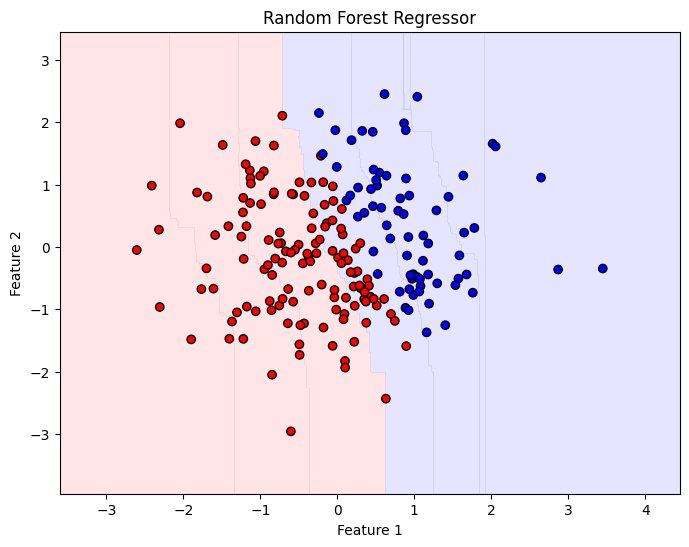

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=140)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = RandomForestRegressor(n_estimators=100)

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Random Forest Regressor')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## regression_gradient_boosting.py

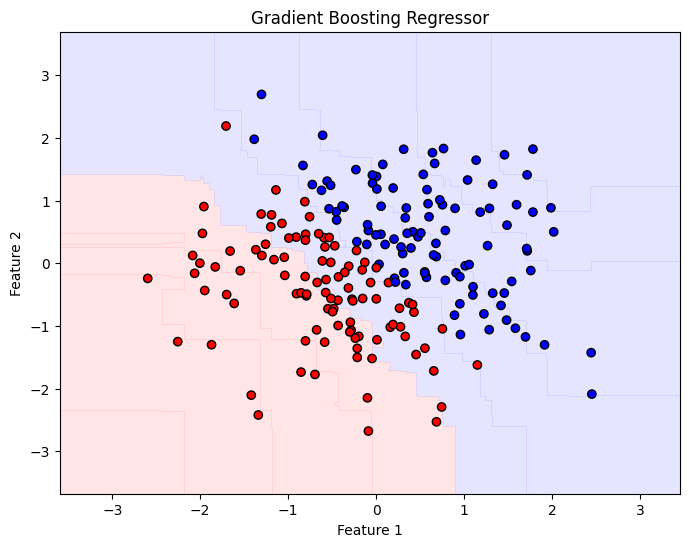

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib.colors import ListedColormap

# Create synthetic dataset with a different random state
X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=150)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = GradientBoostingRegressor()

# Fit the model
model.fit(X_scaled, y)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500),
                     np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Gradient Boosting Regressor')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
